In [49]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [50]:
import wandb
api = wandb.Api()
run_ids = [
    "1wpb02dh",
    "mqb2j0y3",
    "2mbi1968",
    "2o7r4f32",
    "2zghy7cs",
    "24ju3o5b",
]
df_dict = {
    "run_id":[],
    "State":[],
    "model":[],
    "rigl.const_fan_in":[],
    "rigl.dense_allocation":[],
    "training.seed":[],
    "accuracy":[]
}
entity, project = "condensed-sparsity", "condensed-rigl"
for id in run_ids:
    run = api.run(f"{entity}/{project}/{id}")
    summary = run.summary
    config = run.config
    df_dict["run_id"].append(id)
    df_dict["State"].append(run.state)
    df_dict["model"].append(config["model"]["name"])
    df_dict["rigl.const_fan_in"].append(config["rigl"]["const_fan_in"])
    df_dict["rigl.dense_allocation"].append(config["rigl"]["dense_allocation"])
    df_dict["training.seed"].append(config["training"]["seed"])
    df_dict["accuracy"].append(summary["accuracy"])
additional_runs = pd.DataFrame(df_dict)

In [51]:
additional_runs

,run_id,State,model,rigl.const_fan_in,rigl.dense_allocation,training.seed,accuracy
0,1wpb02dh,finished,resnet18,True,0.30,6037,0.9530
1,mqb2j0y3,finished,resnet18,True,0.20,7303,0.9537
2,2mbi1968,finished,resnet18,True,0.30,8746,0.9540
3,2o7r4f32,finished,resnet18,True,0.01,6037,0.9147
4,2zghy7cs,running,resnet18,True,0.01,8746,0.8492
5,24ju3o5b,running,resnet18,True,0.20,42,0.9107


In [52]:
_INDEPENDENT_VARS = [
    "rigl.dense_allocation",
    "rigl.const_fan_in",
    "model",
]

In [53]:
df = pd.read_csv("/home/condensed-sparsity/data/results/wandb_export_2022-06-08T15_49_19.313-06_00.csv")
plt.style.use("../plt_plot_style.mplstyle")

In [54]:
df = pd.concat([df, additional_runs])
df = df.loc[df["State"] == "finished"]

In [55]:
df

,Name,Agent,State,Notes,Created,Runtime,Sweep,dataset,experiment.comment,experiment.name,...,wandb.start_method,paths.base,Learning Rate,acc,epoch,los,loss,new high score,test,run_id
5,wide_resnet22_cifar10_sweep_0.5_False,bd0dcg2j,finished,-,2022-06-08T03:08:39.000Z,17089.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.196530,NaN,NaN,NaN
6,wide_resnet22_cifar10_sweep_0.5_False,4gzb504w,finished,-,2022-06-08T03:08:34.000Z,17126.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.194545,NaN,NaN,NaN
7,wide_resnet22_cifar10_sweep_0.5_False,iwzqfawx,finished,-,2022-06-08T02:58:39.000Z,2709.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.195985,NaN,NaN,NaN
8,wide_resnet22_cifar10_sweep_0.5_False,w9hlspuw,finished,-,2022-06-08T02:47:44.000Z,6191.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.197284,NaN,NaN,NaN
9,wide_resnet22_cifar10_sweep_0.5_False,daalrzlx,finished,-,2022-06-08T02:39:06.000Z,4522.0,4hsfzsa9,cifar10,sweep_0.5_False,wide_resnet22_cifar10_sweep_0.5_False,...,thread,NaN,0.0008,NaN,250.0,NaN,0.195505,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,resnet18_cifar10_sweep_0.01_True,awufzi7x,finished,-,2022-06-04T05:47:31.000Z,7685.0,4hsfzsa9,cifar10,sweep_0.01_True,resnet18_cifar10_sweep_0.01_True,...,thread,NaN,0.0008,NaN,250.0,NaN,0.270424,NaN,NaN,NaN
0,NaN,NaN,finished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1wpb02dh
1,NaN,NaN,finished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mqb2j0y3
2,NaN,NaN,finished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2mbi1968


In [56]:
with open("dict.csv", "w") as handle:
    handle.write(df.to_csv(index=False))

In [57]:
style = """
# Figure properties
figure.figsize: 10, 6 # figure size in inches

# Font properties
font.size: 16 # Size of the font
font.family: sans-serif # Type of Font
font.sans-serif : Helvetica


# Axes properties
axes.linewidth: 2 # edge linewidth
axes.labelpad: 18 # space between label and axis
axes.prop_cycle: cycler(color=['00a5bb','f79141','499585', 'd81e52', '6cb2c5' , '6c77c5', 'c5ba6c', '56ce93', 'd88fBf', 'ffd505']) # color cycle for plot lines
axes.titlepad: 20.0     # pad between axes and title in points
axes.labelsize: 16 # Axes labels size
axes.titlesize: 20 # Plot title size
axes.labelweight: 600 # Axel Labels weight
axes.titleweight: 600 # Axel Titleweight
axes.edgecolor: 262626
axes.labelcolor: 262626
axes.titlecolor: 262626

# Tick properties
# x-axis
xtick.direction: inout # direction: in, out, or inout
xtick.major.size: 0 # major tick size in points
xtick.major.width: 0 # major tick width in points
xtick.minor.size: 0 # minor tick size in points
xtick.minor.width: 0 # minor tick width in points
xtick.major.pad : 10
xtick.minor.pad: 10
xtick.labelsize : 16

# y-axis
ytick.direction: inout # direction: in, out, or inout
ytick.major.size: 0 # major tick size in points
ytick.major.width: 0 # major tick width in points
ytick.minor.size: 0 # minor tick size in points
ytick.minor.width: 0 # minor tick width in points
ytick.major.pad : 10
ytick.minor.pad: 10
ytick.labelsize : 16

# Line properties
lines.linewidth: 3

# Legend properties
legend.framealpha: 0.8 # opacity of legend frame
legend.frameon: True # whether or not to draw a frame around legend
legend.fontsize: 12# Font size of the legend
legend.borderpad : 1
#legend.borderaxespad: 1.5

#Edge Color properties
#patch.force_edgecolor: True #Edge color for the bars
"""
with open("plt_plot_style.mplstyle", "w") as handle:
  handle.write(style)

plt.style.use("./plt_plot_style.mplstyle")

In [59]:
def get_confidence_bounds_df(df: pd.DataFrame, alpha=0.95, target_col:str = "accuracy"):
    df = df.copy()
    df = df.loc[~df[target_col].isna()]
    results = {
        "sparsity":[],
        "mean":[],
        "lower_bound":[],
        "upper_bound":[],
    }
    for sparsity in df["sparsity"].unique():
        this_df = df.loc[df["sparsity"] == sparsity]
        results["sparsity"].append(sparsity)
        results["mean"].append(this_df[target_col].mean())
        lower, upper = st.t.interval(
            alpha=alpha,
            df=len(this_df[target_col])-1,
            loc=this_df[target_col].mean(),
            scale=st.sem(this_df[target_col])
        )
        results["lower_bound"].append(lower)
        results["upper_bound"].append(upper)
    return pd.DataFrame(results)

In [60]:
slice = df.loc[
        (df["rigl.dense_allocation"] == 0.2) &
        (df["rigl.const_fan_in"] == True) &
        (df.model=="resnet18")
    ]
slice

,Name,Agent,State,Notes,Created,Runtime,Sweep,dataset,experiment.comment,experiment.name,...,wandb.start_method,paths.base,Learning Rate,acc,epoch,los,loss,new high score,test,run_id
143,resnet18_cifar10_sweep_0.2_True,6ydlfue3,finished,-,2022-06-04T21:41:25.000Z,25828.0,4hsfzsa9,cifar10,sweep_0.2_True,resnet18_cifar10_sweep_0.2_True,...,thread,NaN,0.0008,NaN,250.0,NaN,0.181287,NaN,NaN,NaN
144,resnet18_cifar10_sweep_0.2_True,tks0cie6,finished,-,2022-06-04T21:41:18.000Z,25912.0,4hsfzsa9,cifar10,sweep_0.2_True,resnet18_cifar10_sweep_0.2_True,...,thread,NaN,0.0008,NaN,250.0,NaN,0.192025,NaN,NaN,NaN
1,NaN,NaN,finished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mqb2j0y3


In [61]:
# df["Mean Accuracy"] = df.groupby(_INDEPENDENT_VARS).mean()["accuracy"].reset_index()
original_df = df.copy()

False
   sparsity     mean  lower_bound  upper_bound
0      0.50  0.95232     0.950038     0.954602
1      0.60  0.95148     0.949650     0.953310
2      0.70  0.95308     0.951599     0.954561
3      0.80  0.95212     0.951236     0.953004
4      0.90  0.94960     0.948469     0.950731
5      0.95  0.94478     0.941031     0.948529
True
   sparsity      mean  lower_bound  upper_bound
0      0.50  0.953360     0.951517     0.955203
1      0.60  0.952760     0.950768     0.954752
2      0.70  0.952940     0.951054     0.954826
3      0.80  0.952567     0.948520     0.956613
4      0.90  0.947420     0.946006     0.948834
5      0.95  0.941720     0.938016     0.945424


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


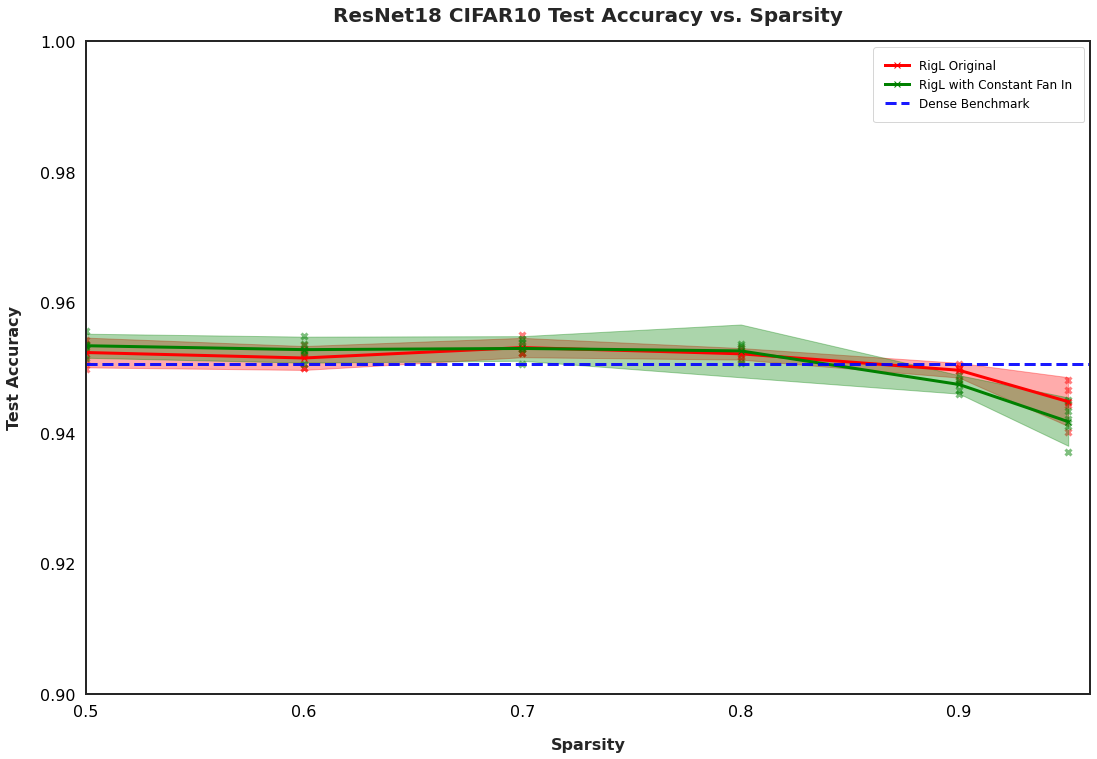

In [62]:
_MODEL = "resnet18"
# original_df = df.copy()
# _MODEL = "wide_resnet22"
# plot_df = mean.reset_index()
plot_df = original_df
plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
plot_df = plot_df.loc[plot_df["model"] == _MODEL]
plot_df["sparsity"] = 1-plot_df["rigl.dense_allocation"]
plot_dfs = []
fig, ax = plt.subplots(figsize=(18,12))
colors = ['red','green','blue']


for idx, fan_in in enumerate(plot_df["rigl.const_fan_in"].unique()):
    print(fan_in)
    df = plot_df.loc[plot_df["rigl.const_fan_in"] == fan_in]
    if fan_in:
        name = "RigL with Constant Fan In"
    else:
        name = "RigL Original"
    agg_results = get_confidence_bounds_df(df)
    ax.plot(
        agg_results["sparsity"], agg_results["mean"], marker='x', label=name, color=colors[idx], alpha=1.0
    )
    # ax.plot(
    #     agg_results["sparsity"], agg_results["upper_bound"], color=colors[idx], alpha=0.33
    # )
    # ax.plot(
    #     agg_results["sparsity"], agg_results["lower_bound"], color=colors[idx], alpha=0.33
    # )
    ax.fill_between(
        agg_results["sparsity"],
        agg_results["upper_bound"],
        agg_results["lower_bound"],
        color=colors[idx],
        alpha=0.33)
    ax.scatter(
        df["sparsity"], df.accuracy, marker='x', color=colors[idx], alpha=0.5
    )
    print(agg_results)
_BENCHMARK_VALUE = 0.9506
ax.plot([0.5, 1.0], [_BENCHMARK_VALUE, _BENCHMARK_VALUE], "--",  label="Dense Benchmark", color=colors[2], alpha=0.9)
model_name_dict = dict(
    resnet18="ResNet18",
    wide_resnet22="WideResNet22"
)
plt.title(f"{model_name_dict[_MODEL]} CIFAR10 Test Accuracy vs. Sparsity")
plt.xlabel('Sparsity')
plt.ylabel('Test Accuracy')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_ylim([0.9,1.0])
ax.set_xlim([0.5,.96])
plt.show()
fig.savefig("resnet_cifar_results.png", dpi=600, bbox_inches="tight")
fig.savefig("resnet_cifar_results.svg",format="svg", bbox_inches="tight")


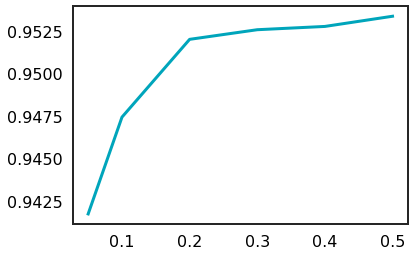

In [21]:
x,y = agg_results["sparsity"], agg_results["mean"]
plt.plot(x,y)

In [104]:
_MODEL = "resnet18"
# _MODEL = "wide_resnet22"
plot_df = mean.reset_index()
plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
plot_df = plot_df.loc[plot_df["model"] == _MODEL]
plot_df["sparsity"] = 1-plot_df["rigl.dense_allocation"]
plot_dfs = []

fig = go.Figure()

for fan_in in plot_df["rigl.const_fan_in"].unique():
    df = plot_df.loc[plot_df["rigl.const_fan_in"] == fan_in]
    if fan_in:
        name = "RigL with Constant Fan In"
    else:
        name = "RigL Original"
    fig.add_trace(
        go.Scatter(x=df["sparsity"], y=df.accuracy, name=name)
    )

_BENCHMARK_VALUE = 0.9506
fig.add_trace(
    go.Scatter(
        y=[_BENCHMARK_VALUE, _BENCHMARK_VALUE ],
        x=[0.5,1.0],
        mode="lines",
        line_dash="dash",
        name = "Dense Benchmark",
        line=dict(color="#3cb589")
    )
)

# fig.add_hline(y=0.9506, line_width=3, line_dash="dash", opacity=0.2, name="Benchmark")
model_name_dict = dict(
    resnet18="ResNet18",
    wide_resnet22="WideResNet22"
)
for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
    print(template)
    fig.update_layout(
        template=template,
        title=f"{model_name_dict[_MODEL]} Accuracy vs. Sparsity",
        xaxis_title = "Sparsity",
        yaxis_title = "CIFAR10 Test Accuracy",
        title_x=0.5,
        width=800,
        height=800,
        legend=dict(
            yanchor="bottom",
            y=0.01,
            xanchor="left",
            x=0.01
        ),
        font=dict(
            size=24
        ),
        yaxis_tick0=0.85,
        yaxis_dtick=0.01,
        yaxis_range=(0.92,0.97)
    )
    fig.show()


plotly


plotly_white


plotly_dark


ggplot2


seaborn


simple_white


none
